# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from wordcloud import WordCloud
%matplotlib inline

In [2]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
'''# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# twitter_arch is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

In [4]:
tweet_id, ret_c, fav_c = [],[],[]

for i in open('tweet_json.txt', 'r'):
    temp = json.loads(i)
    tweet_id.append(temp['id'])
    ret_c.append(temp['retweet_count'])
    fav_c.append(temp['favorite_count'])

tweet_json_df = pd.DataFrame({'tweet_id': tweet_id, 'retweet_count': ret_c, 'favorite_count': fav_c})
tweet_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
pd.set_option('display.max_colwidth', 1000)

Displaying dataframes info.

In [21]:
twitter_arch.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brudge. He's a Doberdog. Going to be h*ckin massive one day. 11/10 would pat on head approvingly https://t.co/cTlHjEUNK8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766693177336135680/photo/1,11,10,Brudge,None,None,None,None
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716285507865542656/photo/1,https://twitter.com/dog_rates/status/716285507865542656/photo/1",12,10,Stephanus,None,None,None,None
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10 https://t.co/rvSANEsQZJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813187593374461952/photo/1,13,10,None,None,None,None,None


In [14]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
image_pred_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True


In [16]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweet_json_df.sample(3)

,tweet_id,retweet_count,favorite_count
1524,690374419777196032,972,3560
1744,679132435750195208,1314,3253
540,806242860592926720,13616,0


In [17]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


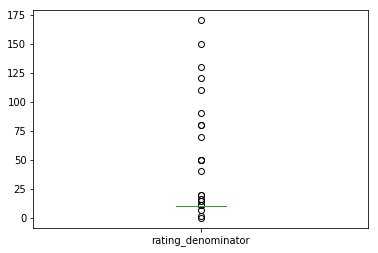

In [27]:
#Simple visualization to view outliers in 'rating_denominator'.
twitter_arch.rating_denominator.plot(kind='box');

In [28]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [5]:
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
twitter_arch[twitter_arch['text'].str.startswith('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [26]:
#Check if 'p1_conf' is always larger than the other confs.
((image_pred_df['p1_conf'] > image_pred_df['p2_conf']) & (image_pred_df['p1_conf'] > image_pred_df['p3_conf'])).all()

True

In [28]:
#Check for duplicates.
print(twitter_arch.duplicated().sum())
print(tweet_json_df.duplicated().sum())
print(image_pred_df.duplicated().sum())

0
0
0


In [5]:
#Check for missing values
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
tweet_json_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [9]:
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [72]:
#Non-dogs records
pred['p1'].value_counts().tail(60)

dhole                       1
china_cabinet               1
bearskin                    1
pitcher                     1
microwave                   1
ping-pong_ball              1
soccer_ball                 1
carton                      1
three-toed_sloth            1
banana                      1
bakery                      1
barbell                     1
African_grey                1
padlock                     1
hay                         1
nail                        1
beaver                      1
handkerchief                1
hand_blower                 1
basketball                  1
sulphur-crested_cockatoo    1
boathouse                   1
bee_eater                   1
crash_helmet                1
agama                       1
EntleBucher                 1
loupe                       1
harp                        1
mud_turtle                  1
ice_lolly                   1
electric_fan                1
lynx                        1
conch                       1
pedestal  

In [21]:
#Print common tweet ids.
print(twitter_arch['tweet_id'].isin(image_pred_df['tweet_id']).sum())
print(twitter_arch['tweet_id'].isin(tweet_json_df['tweet_id']).sum())

2075
2354


In [39]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [43]:
#Tidness issue.
twitter_arch[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
1963,None,None,None,None
147,None,None,None,None
392,None,None,None,None
1494,None,None,None,None
1461,None,None,None,None
1002,None,None,None,None
1789,None,None,None,None
1039,doggo,None,None,None
1753,None,None,pupper,None
2243,None,None,None,None


In [58]:
#Dogs names that are None
twitter_arch[twitter_arch['name'] == 'None'][['name']].head(5)

,name
5,None
7,None
12,None
24,None
25,None


In [42]:
#Dog name that's one char only.
twitter_arch[twitter_arch['name'].apply(lambda x: len(str(x)) == 1)][['name']].head(5)

,name
56,a
649,a
775,O
801,a
1002,a


### Quality issues
1. In all three dataframes, there're in total seven features contain ids in float or int data type, but ids always should be string, because python removes the leading zeros and this might affect the integrity of the data and also to help merging the data.
<br>
<br>
2. There're tweets that don't show in all the three dataframes.
<br>
<br>
3. In twitter_arch dataframe, the 'timestamp' variable type is object, should be converted to datetime.
<br>
<br>
4. In twitter_arch dataframe, there're 181 retweets and according to the key points above, it should be removed.
<br>
<br>
5. In all dataframes, we should drop uneeded attributes for our use case.
<br>
<br>
6. In image_pred_df, since p1 is always larger than the p2 and p3, we should drop them and keep p1 only.
<br>
<br>
7. In twitter_arch dataframe, the attribute 'name' have nulls and names of one letter only, doesn't make sense.
<br>
<br>
8. In the attributes p1, p2 and p3, there're nonsense values like starfish or desktop_computer or zebra!

### Tidiness issues
1. Since most of the tweets ids are common across the three datasets, these dataset should be merged into one dataset to reduce the coding overhead.
<br>
<br>
2. The last four columns of twitter_arch dataframe should be one column only.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [5]:
# Make copies of original pieces of data
arch = twitter_arch.copy()
json = tweet_json_df.copy()
pred = image_pred_df.copy()

### Issue #1: Non-string ids

#### Define: In all three dataframes, there're in total seven features contain ids in float or int data type, but ids always should be string, because python removes the leading zeros and this might affect the integrity of the data and also to help merging the data.
#### But since not all the seven ids are needed, we clean only 'tweet_it'.

#### Code

In [6]:
arch['tweet_id'] = arch['tweet_id'].astype(str)
json['tweet_id'] = json['tweet_id'].astype(str)
pred['tweet_id'] = pred['tweet_id'].astype(str)

#### Test

In [269]:
print(arch['tweet_id'].dtypes)
print(json['tweet_id'].dtypes)
print(pred['tweet_id'].dtypes)

object
object
object


### Issue #2: Inconsistant tweets 

#### Define: There're tweets that don't show in all the three dataframes, so we should drop them.

#### Code

In [8]:
arch = arch[arch['tweet_id'].isin(set(json['tweet_id']) & set(pred['tweet_id']))]
json = json[json['tweet_id'].isin(set(arch['tweet_id']) & set(pred['tweet_id']))]

#### Test

In [9]:
(arch['tweet_id'].isin(set(json['tweet_id']) & set(pred['tweet_id']))).all()

True

### Issue #3: 'timestamp' is not datetime data type

#### Define: The attribute 'timestamp' should be converted to datetime data type.

#### Code

In [10]:
arch['timestamp'] = pd.to_datetime(arch['timestamp'])

#### Test

In [11]:
arch['timestamp'].dtypes

dtype('<M8[ns]')

### Issue #4:Removing retweets

#### Define: In twitter_arch dataframe, there're 181 retweets and according to the key points above, it should be removed.

#### Code

In [12]:
arch = arch[~arch['text'].str.startswith('RT @')]

#### Test

In [13]:
arch[arch['text'].str.startswith('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5 Uneeded variables

#### Define: In all dataframes, we should drop uneeded attributes for our use case and analysis.

#### Code

In [14]:
arch = arch[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]
pred = pred[['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]

#### Test

In [16]:
arch.head(2)

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Tilly,None,None,None,None


In [17]:
pred.head(2)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #6: Drop 'p2' and 'p3' attributes.

#### Define: since p1 is always larger than the p2 and p3, we should drop them and keep p1 only for having the highest probabilty.

#### Code

In [22]:
pred = pred[['tweet_id', 'p1', 'p1_conf', 'p1_dog']]

#### Test

In [23]:
pred.head(2)

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True


### Issue #7: Unvalid dog names

#### Define: the attribute 'name' have missing names or one letter names only, doesn't make sense, but the record is still valid, we can give all of unvalid names a new one to reduce data waste.

#### Code

In [349]:
dogs_names = ['mike', 'luke', 'bella', 'cooper', 'milo']
arch['name'] = np.where((arch['name'].apply(lambda x: len(str(x)) == 1) | (arch['name'] == 'None')), np.random.choice(dogs_names), arch['name'])

#### Test

In [64]:
arch[arch['name'].apply(lambda x: len(str(x)) == 1) | (arch['name'] == 'None')][['name']]

,name


### Issue #8: Non-dogs records.

#### Define: In the attribute p1, there're nonsense values like starfish or desktop_computer or zebra, we should remove them.

#### Code

In [135]:
pred = pred[pred['p1_dog'] == True]

#### Test

In [136]:
pred[pred['p1_dog'] == False]

,tweet_id,p1,p1_conf,p1_dog


### Tidness issues

### Issue #1: Merging all datasets with 'tweet_id'

#### Define:Since most of the tweets ids are common across the three datasets, these dataset should be merged into one dataset to reduce the coding overhead.

#### Code

In [248]:
twitter_archive_master = pd.merge(pd.merge(arch, json, how = 'inner'), pred, how ='inner')

#### Test

In [244]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,p1,p1_conf,p1_dog
1299,670832455012716544,2015-11-29 05:11:35,This is Amy. She is Queen Starburst. 10/10 une...,10,Amy,None,None,None,None,242,780,malinois,0.317607,True
521,759923798737051648,2016-08-01 01:28:46,We only rate dogs... this is a Taiwanese Guide...,10,bella,None,None,None,None,6521,16284,Labrador_retriever,0.324579,True
599,747594051852075008,2016-06-28 00:54:46,Again w the sharks guys. This week is about do...,11,bella,None,None,None,None,1205,4065,basenji,0.389136,True
627,741743634094141440,2016-06-11 21:27:17,Meet Aqua. She's a sandy pupper. Not sure how ...,11,Aqua,None,None,pupper,None,3144,8945,Labrador_retriever,0.786089,True
813,705975130514706432,2016-03-05 04:36:02,This is Adele. Her tongue flies out of her mou...,10,Adele,None,None,pupper,None,842,3397,Staffordshire_bullterrier,0.587764,True


### Issue #2: aggregating 'doggo', 'floofer', 'pupper', 'puppo' attributes

#### Define: The four columns'doggo', 'floofer', 'pupper', 'puppo' attributes should be one column only.

#### Code

In [249]:
#Replace None with empty string to help aggergate the four columns.
agg_cols = twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
#Start aggregating with space (if a dog have two types, i.e. pupper and floofer).
agg_cols = agg_cols[['doggo', 'floofer', 'pupper', 'puppo']].agg(' '.join, axis=1)
#Drop the old columns.
twitter_archive_master = twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
#Insert the four aggegated columns as one column.
twitter_archive_master.insert(5, 'dog_type', agg_cols)

#### Test

In [247]:
twitter_archive_master.sample(2)

,tweet_id,timestamp,text,rating_numerator,dog_type,name,retweet_count,favorite_count,p1,p1_conf,p1_dog
768,710117014656950272,2016-03-16 14:54:24,This pupper got her hair chalked for her birth...,11,pupper,bella,2233,5999,toy_poodle,0.802092,True
121,857393404942143489,2017-04-27 00:38:11,"Instead of the usual nightly dog rate, I'm sha...",13,,bella,1785,6236,malamute,0.841597,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [250]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [252]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,name,dog_type,retweet_count,favorite_count,p1,p1_conf,p1_dog
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Tilly,,6514,33819,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,,4328,25461,Chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,Franklin,,9774,41048,basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,bella,,3261,20562,Chesapeake_Bay_retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,,2158,12041,Appenzeller,0.341703,True


### Q1 - What's the most common dog names?

In [362]:
#Using the function value_counts() to view the top 10 common names.
twitter_archive_master['name'].value_counts().head(10)

bella      407
Cooper      10
Charlie     10
Oliver       9
Lucy         8
Tucker       8
Daisy        7
Sadie        7
Penny        7
Jax          6
Name: name, dtype: int64

### Q1 - Visualization

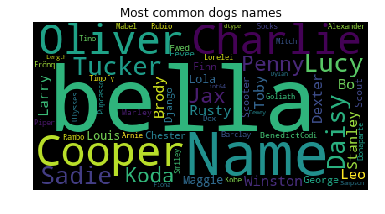

In [364]:
#Using wordcloud (The bigger, the higher frequency).
wordcloud = WordCloud().generate(str(twitter_archive_master['name'].value_counts()))

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most common dogs names')
plt.show()

### Q2 - Is there's a relationship between the tweet likes and retweets?

In [319]:
#Checking the correlation.
twitter_archive_master[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.910912
favorite_count,0.910912,1.000000


### Q2 -  Visualization

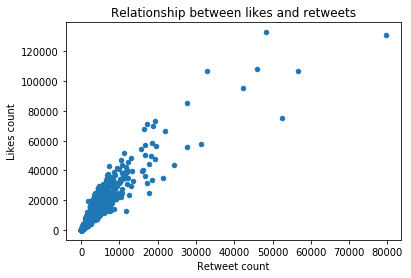

In [320]:
#Plotting a scatter plot to verify the strong positive correlation.
twitter_archive_master.plot(y ='favorite_count', x ='retweet_count', kind='scatter')
plt.xlabel('Retweet count')
plt.ylabel('Likes count')
plt.title('Relationship between likes and retweets')
plt.show();

### Q3 - What's the mean tweet favorites for each dog type?

In [369]:
#Using groupby function and sort_values to view each dog type favorites average.
twitter_archive_master.groupby('p1')['favorite_count'].mean().sort_values().tail(10)

p1
Leonberg                   14934.333333
Cardigan                   15311.000000
English_springer           15657.222222
standard_poodle            15786.000000
Irish_water_spaniel        16400.000000
flat-coated_retriever      16791.625000
black-and-tan_coonhound    17012.000000
Afghan_hound               17326.666667
French_bulldog             17913.000000
Saluki                     24060.000000
Name: favorite_count, dtype: float64

### Q3 -  Visualization

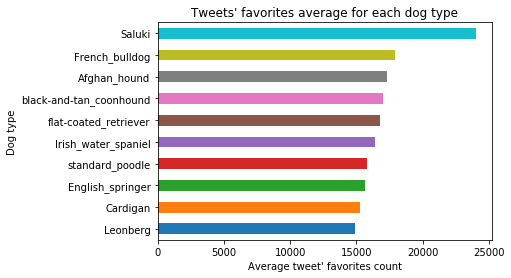

In [375]:
#Using bar chart to view the average favorites for each dog type. 
twitter_archive_master.groupby('p1')['favorite_count'].mean().sort_values().tail(10).plot(kind = 'barh');
plt.ylabel('Dog type')
plt.xlabel("Average tweet' favorites count")
plt.title("Tweets' favorites average for each dog type")
plt.show();

### Insights:
1. We can see in the word cloud chart that the most common dog names are:
 - bella      
 - Cooper     
 - Charlie     
 - Oliver       
 - Lucy         
 - Tucker      
 - Daisy        
 - Sadie        
 - Penny        
 - Jax   
 <br>
However, the name bella is most common because it was choosen randomly by our code in cleaning data section, the actual most common starts descending down from the name Cooper. 
<br>
<br>
2. There's a strong relationship between favorites and retweets for a tweet with a value of 0.91, and the scatter plot helps to visualize it.
<br>
<br>
3. According to our data, the most dog types that people tend to like the tweet of are:
 - Saluki    
 - French_bulldog  
 - Afghan_hound  
 - black-and-tan_coonhound    
 - flat-coated_retriever 
 - Irish_water_spaniel   
 - standard_poodle    
 - English_springer 
 - Cardigan              
 - Leonberg               
     
      
     
  

            
           
      